In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import datetime as datetime;
import os;
with open("../../secrets/secrets.json") as json_file:  
            secrets = json.load(json_file);
os.environ["WEB3_INFURA_PROJECT_ID"] = secrets["WEB3_INFURA_PROJECT_ID"];
from web3.auto.infura import w3 as web3;

In [39]:
def getSeries(fileNames):  
    series = pd.Series() 
    for file in fileNames:
        with open('../'+file) as json_file:  
            result = json.load(json_file)

        for i in result['data']:
            series = series.append(pd.Series([i['marketCap']], index=[i['date']]))
    series.index = pd.to_datetime(series.index)
    return series

In [50]:
from datetime import datetime
series = series[series.index > datetime(2016, 7, 1)]
series

2016-07-17    9.249898e+08
2016-07-18    9.430213e+08
2016-07-19    9.230022e+08
2016-07-20    9.680559e+08
2016-07-21    1.016466e+09
2016-07-22    1.048873e+09
2016-07-23    1.180928e+09
2016-07-24    1.177658e+09
2016-07-25    1.093483e+09
2016-07-26    1.126413e+09
2016-07-27    1.017407e+09
2016-07-28    1.050976e+09
2016-07-29    1.045550e+09
2016-07-30    1.050163e+09
2016-07-31    1.022581e+09
2016-08-01    9.741405e+08
2016-08-02    8.644917e+08
2016-08-03    8.046288e+08
2016-08-04    8.729244e+08
2016-08-05    8.966213e+08
2016-08-06    8.982879e+08
2016-08-07    9.068209e+08
2016-08-08    9.080343e+08
2016-08-09    9.331363e+08
2016-08-10    1.024632e+09
2016-08-11    1.000275e+09
2016-08-12    9.672964e+08
2016-08-13    9.688406e+08
2016-08-14    9.637549e+08
2016-08-15    9.373283e+08
                  ...     
2019-06-15    2.037997e+10
2019-06-16    3.744316e+10
2019-06-17    2.460479e+10
2019-06-18    2.179995e+10
2019-06-19    1.997088e+10
2019-06-20    2.488998e+10
2

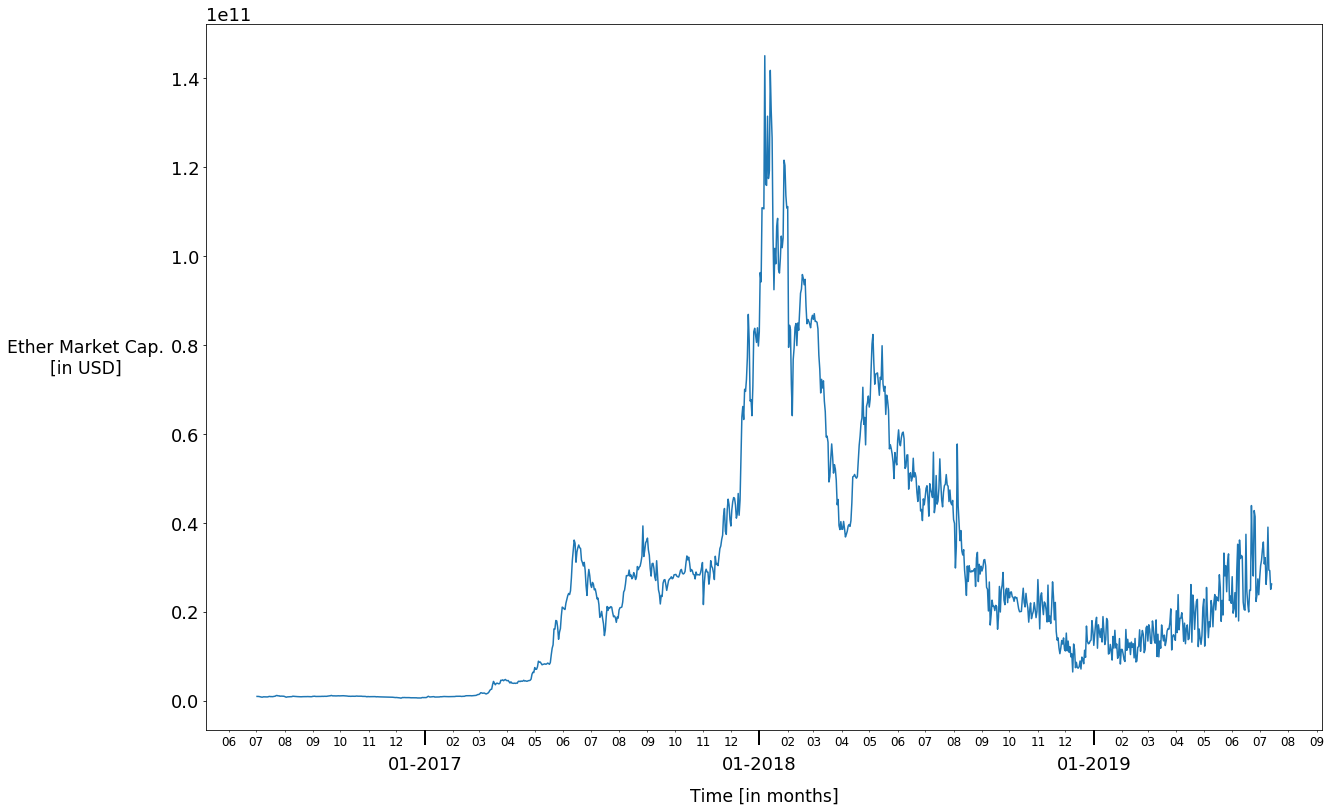

In [91]:
series = getSeries(fileNames = ["data_marketcap_ETH_2013-07-14_2015-07-14.json", "data_marketcap_ETH_2015-07-14_2017-07-14.json", "data_marketcap_ETH_2017-07-14_2019-07-14.json"])

from datetime import datetime
series = series[series.index > datetime(2016, 7, 1)]

series.sort_index(inplace=True)

fig, ax = plt.subplots(figsize= (20,13))
ax.plot(series)

ax.tick_params(
    which="major",
    axis='x', 
    bottom=True,      
    top=False,        
    labelbottom=True,
#     labelsize= 2,
    pad = 10,
    length = 15,
    width = 2
    ) 

ax.tick_params(
    which="minor",
    axis='x', 
    labelsize= 12,
    ) 

ax.set_xlabel( "Time [in months]", fontsize="xx-large", labelpad=100);
ax.xaxis.set_label_coords(0.5, -0.08)
ax.set_ylabel("Ether Market Cap.\n[in USD]", fontsize="xx-large", rotation=0, labelpad=85);

import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%m-%Y')
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%m')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(months_fmt)

# plt.rc('xtick',labelsize=18)
# plt.rc('ytick',labelsize=18)
# series.plot(figsize=(25,13))


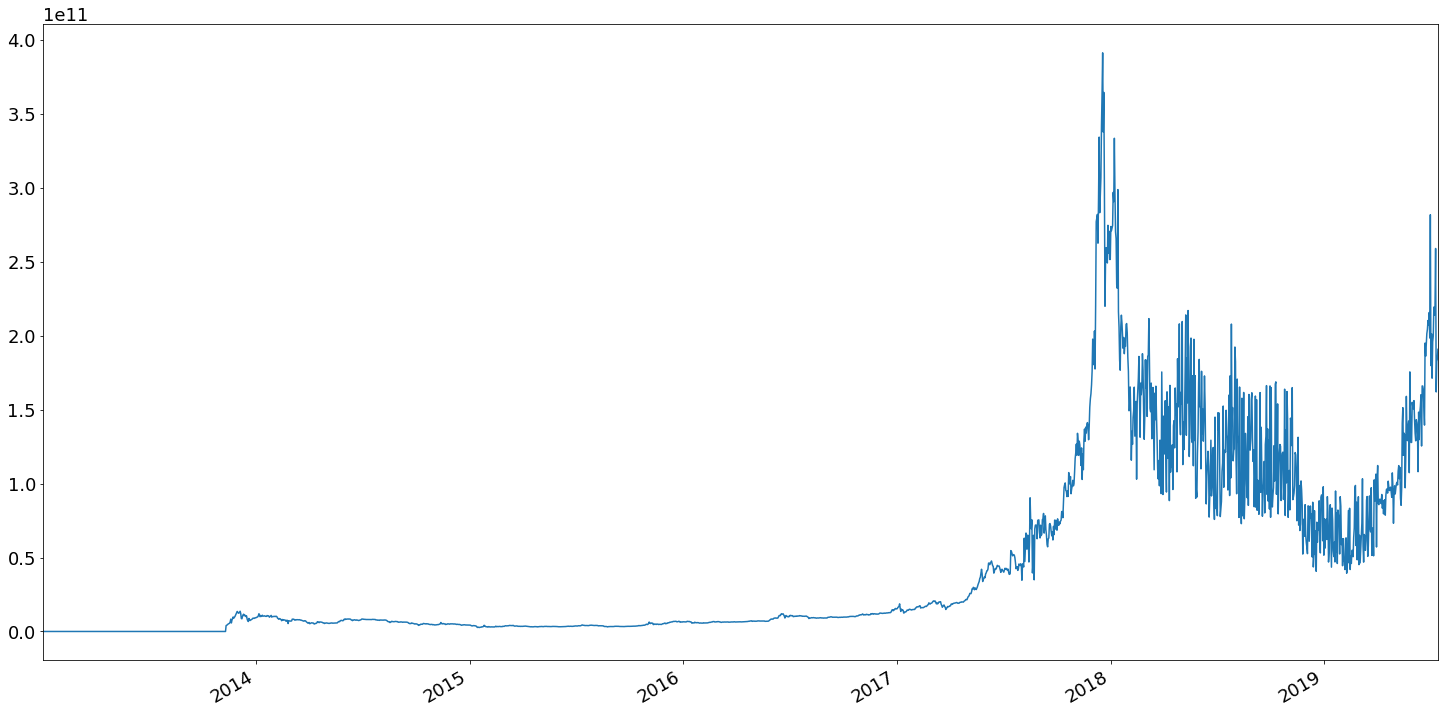

In [54]:
series = getSeries(fileNames = ["data_marketcap_2017-07-14_2019-07-14.json", "data_marketcap_2015-07-14_2017-07-14.json","data_marketcap_2013-07-14_2015-07-14.json","data_marketcap_2011-07-14_2013-07-14.json"])
series.sort_index(inplace=True)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
series.plot(figsize=(25,13))
# plt.xlabel('Timeinterval', fontsize=18)